In [81]:
# Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [82]:
data = pd.read_csv('../diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
row, col = data.shape
print("Row = ", row)
print("Col = ", col)

Row =  768
Col =  9


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [86]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [87]:
select_col_df = data[select_col]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [88]:
mean_value = select_col_df.iloc[1:2, :].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [89]:
data['BloodPressure'].median()

72.0

In [90]:
#Replace the values euql to 0 by the median

for col in select_col:
    data[col].replace(0, data[col].median(), inplace=True)

C:\Users\arjun\AppData\Local\Temp\ipykernel_18440\2565163751.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, data[col].median(), inplace=True)
C:\Users\arjun\AppData\Local\Temp\ipykernel_18440\2565163751.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [91]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [92]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [93]:
data_counts = data['Outcome'].value_counts()

non_diab = data[data['Outcome']== 0].iloc[0:268]

diab = data[data['Outcome'] == 1]

data1 = pd.concat([non_diab, diab]).sample(frac=1)

data1['Outcome'].value_counts()

Outcome
1    268
0    268
Name: count, dtype: int64

In [94]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.046642,126.688433,72.878731,27.791045,100.217351,33.087500,0.494119,33.835821,0.500000
std,3.441863,31.496654,11.959520,9.515025,115.010275,6.965805,0.348858,11.348148,0.500467
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,103.000000,66.000000,23.000000,30.500000,28.375000,0.254000,24.750000,0.000000
50%,3.000000,122.000000,72.000000,23.000000,31.250000,32.750000,0.389000,31.000000,0.500000
75%,6.000000,147.000000,80.000000,33.000000,135.000000,37.025000,0.656250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


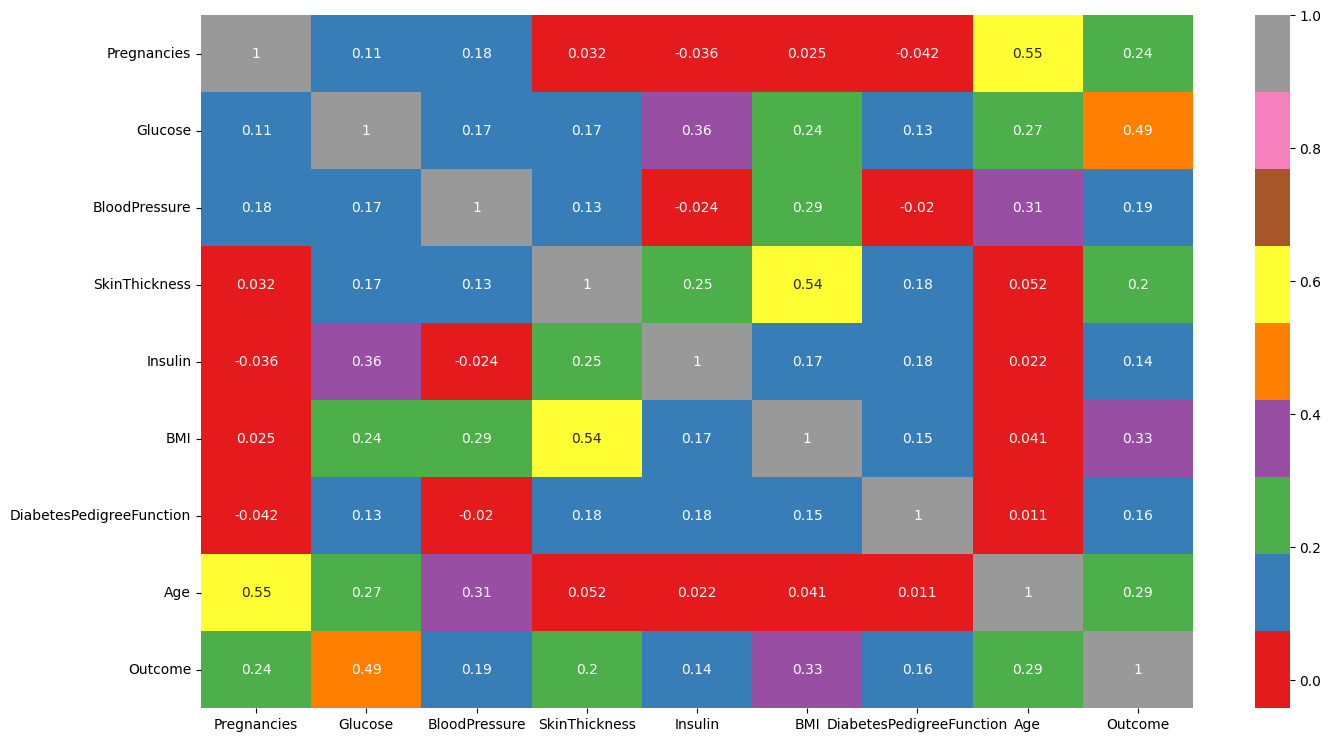

In [95]:
plt.figure(figsize=(16,9))
corr= data1.corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()

In [96]:
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
132,3,170,64,37,225.0,34.5,0.356,30,1
241,4,91,70,32,88.0,33.1,0.446,22,0
169,3,111,90,12,78.0,28.4,0.495,29,0
324,2,112,75,32,30.5,35.7,0.148,21,0
268,0,102,52,23,30.5,25.1,0.078,21,0
...,...,...,...,...,...,...,...,...,...
390,1,100,66,29,196.0,32.0,0.444,42,0
57,0,100,88,60,110.0,46.8,0.962,31,0
238,9,164,84,21,30.5,30.8,0.831,32,1
339,7,178,84,23,30.5,39.9,0.331,41,1


In [97]:
# training and normalization of data
x = data.iloc[:, :8].values
y = data.iloc[:, 8:].values


X_train, X_test, Y_train, Y_test  = train_test_split(x,y, test_size=0.20, random_state=1)


In [98]:
model = LogisticRegressionCV(cv=8, max_iter=800)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
test_data = data.iloc[101:102]
print(test_data)
output = test_data['Outcome']

test_data.drop(['Outcome'], axis = 1, inplace = True)
print("Predicted output = ",model.predict(test_data)[0])
print("Actual Output = ", output.values[0])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
101            1      151             60             23     30.5  26.1   

     DiabetesPedigreeFunction  Age  Outcome  
101                     0.179   22        0  
Predicted output =  0
Actual Output =  0


C:\Users\arjun\AppData\Local\Temp\ipykernel_18440\3275744834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Outcome'], axis = 1, inplace = True)
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


In [100]:
print("The train accuracy score = ",round(model.score(X_train,Y_train)*100,2))
print("The test accuracy score = ",round(model.score(X_test,Y_test)*100,2))


The train accuracy score =  76.87
The test accuracy score =  75.97


In [102]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(Y_test, prediction)
conf_matrix

array([[87, 12],
       [25, 30]], dtype=int64)

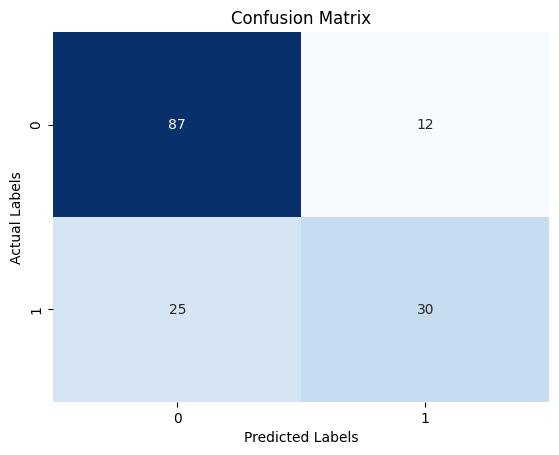

In [103]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [104]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

